In [41]:
import h5py
import numpy as np
import seaborn as sns
from sklearn.metrics import root_mean_squared_error as RMSE
import matplotlib.pyplot as plt

In [32]:
def Read_Results(method, case):
    if case == 1:
        with h5py.File(f"./Results/PLS2_PM25_{method}.h5", "r") as f:
            dat={'timer': f['timer'][:],
                 'ypred': f['ypred'][:],
                 'coef':  f['coef'][:]}
    else: 
        with h5py.File(f"./Results/PLS2_PM25_{method}.h5", "r") as f:
            dat={'ypred': f['ypred'][:],
                 'coef':  f['coef'][:]}
    return dat

In [38]:
SIMPLS  = Read_Results('SIMPLS', 0)
ISIMPLS = Read_Results('ISIMPLS', 1)

print("ypred Error: {:15.7e}".format(RMSE(SIMPLS['ypred'], ISIMPLS['ypred'])))
print("coef Error:  {:15.7e}".format(RMSE(SIMPLS['coef'], ISIMPLS['coef']))) 

ypred Error:   3.3905327e-14
coef Error:    1.4113864e-16


In [39]:
NIPALS  = Read_Results('NIPALS', 0)
OLPLS = Read_Results('OLPLS', 1)

print("ypred Error: {:15.7e}".format(RMSE(NIPALS['ypred'], OLPLS['ypred']))) 
print("coef Error:  {:15.7e}".format(RMSE(NIPALS['coef'], OLPLS['coef'])) ) 

ypred Error:   8.3183698e+00
coef Error:    3.5312340e-03


Text(0, 0.5, 'Time(s)')

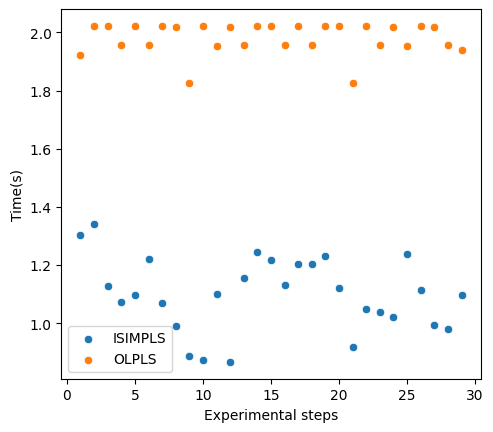

In [47]:
N_steps= len(ISIMPLS['timer'][0])
fig, ax = plt.subplots()
plt.subplots_adjust(right=.78)

sns.scatterplot(ax=ax, x=range(1,N_steps+1), y=ISIMPLS['timer'][1], label='ISIMPLS')
sns.scatterplot(ax=ax, x=range(1,N_steps+1), y=OLPLS['timer'][1], label='OLPLS')

ax.set_xlabel("Experimental steps")
ax.set_ylabel("Time(s)")